There are 5 main assumptions of linear regression:
1. Linear relationship between input and output
2. No multicollinearity
3. Normality of residuals
4. Homoscedasticity
5. No autocorrelation of errors


##  1. Linear relationship between input and output:
* As X value increases, y also should increase(1st graph), this is positively correlated, even if let's say X is increasing and y is decreasing step by step(2nd graph), this is also called linear but negatively correlated. But if X is increasing normally and y is increasing at double rate(3rd graph), then this is non linear relationship.
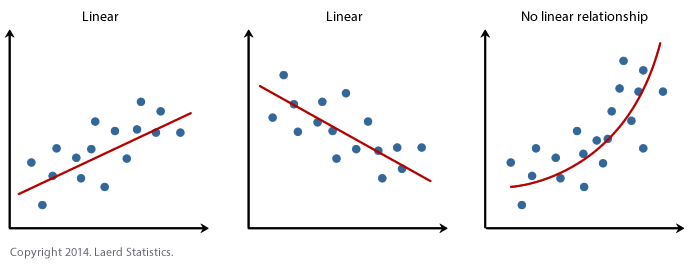

* **What if we have multiple input columns**: Then also for every input(feature) the relationship with output should be linear

## 2. No multicollinearity:
* Assumption says there is should not be multicollinearity between independent features.
* Multicollinearity occurs when two or more independent variables are highly correlated with one another. For eg: if features are: X1, X2 and X3, so if increasing X1 and also shows changes in X2, then this is scenario of multicollinearity.
* Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:
        y = β0 + β1X1 + β2X2
* Coefficient β1 is the increase in y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on y.
* As we know, in regression we want to understand, impact of all the variables individually on target, but multicollinearity prevents that. So that's why multicollinearity is a problem.

## 3. Normality of residuals:
* In linear regression, we plot a line distinguishing points, which basically best fits the data. This line represents for a particular X what should be y. As we can see in below image, on the line is the predicted value of the point just above or below it, that is actual point(blue circle). Residuals are these errors, difference between predicted and actual value of points.

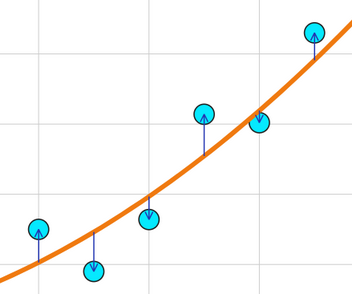

* **So this assumption says, if we plot all these residuals, it should give normal distribution**(bell curve), which means most of the values should be mean centric.

## 4. Homescedasticity:
* Assumption says: **Your data needs to show homoscedasticity**
* Homo means same, scedasticity means spread or scatter. So, having the same scatter.
* So, when we plot our residuals then their spread should be equal
* We plot scatter plot using prediction(on x-axis) and residual(on y-axis), then it should be uniform

* For eg, in below image, 1st graph is showing homoschedasticity as spread is throughout the x-axis and rest two are showing heteroschedasticity as spread is not continuous, somewhere it is not less and somewhere it is more.
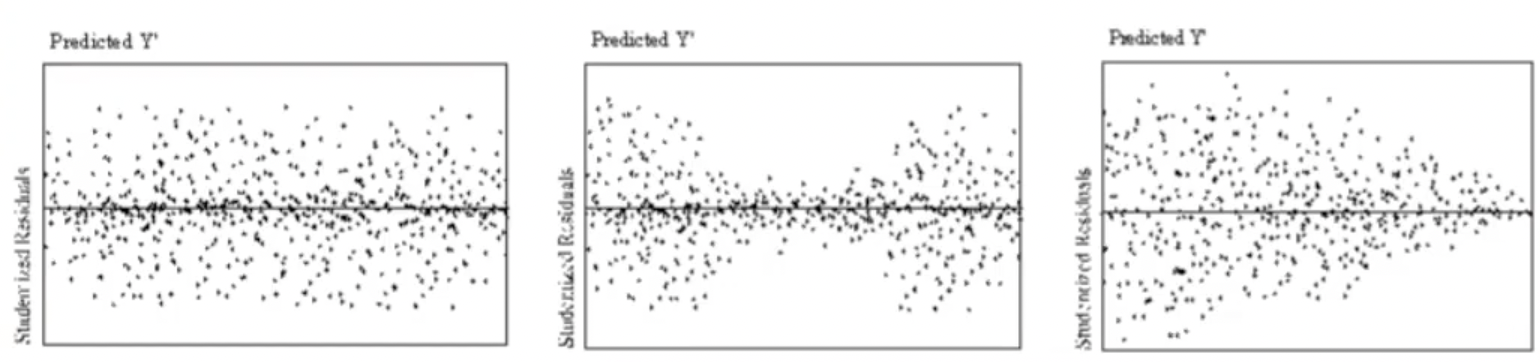

## 5. No Autocorrelation of error:
* If we plot all residual values, then no pattern should be formed.
* Like in first graph we can see a pattern is found, but in second graph it is random, and we want random only.

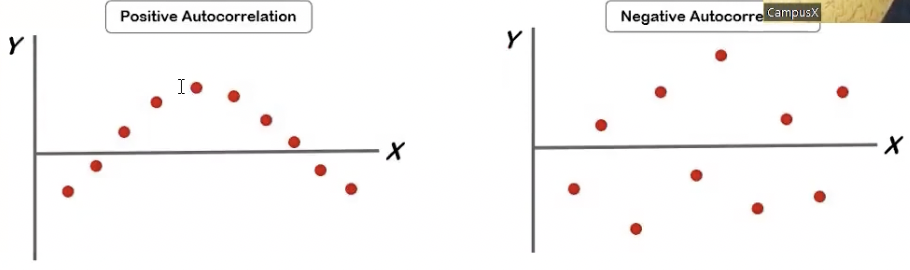

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
# Getting dependent and independent feature
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [16]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred
residual

array([ 32.30806809,   0.46904443, -31.32809124,  22.08116144,
       -19.48224904,  14.53811846, -13.06186752,  -6.4005597 ,
        39.20256545, -29.29044906,   4.75248151, -19.57569445,
        -3.0065195 , -10.3924627 , -21.25888025,  11.55754461,
         8.62447468, -18.07049676,  -4.94076456,  35.61424035,
        20.12399832,  12.27393405, -26.31860141, -45.95327491,
         3.37760864, -11.49543562,  10.9718074 ,   6.30338945,
       -12.76318311,   8.71883535, -14.22352902,  15.87149439,
         8.46501917,  20.24567261, -20.1977093 ,  14.87670373,
        -3.57968224,  24.32042365, -18.93235423,   4.8939494 ,
        22.49334603, -37.72924312, -28.40177141, -41.04190332,
        11.18585659,   2.09365624, -12.96308959,  18.61567073,
       -22.47871086,  12.42202957,  -2.29240143,   7.67369719,
        20.01054442,   7.09808748,   0.77941307,  33.59206216,
       -23.14001768,  20.90778006,  -2.74463247,  10.58652756])

### Linear Relationship:

We plot graph for each feature, we see feature 1 shows linear relationship and feature 3 could be possibly linear, but feature 2 is non-linear.

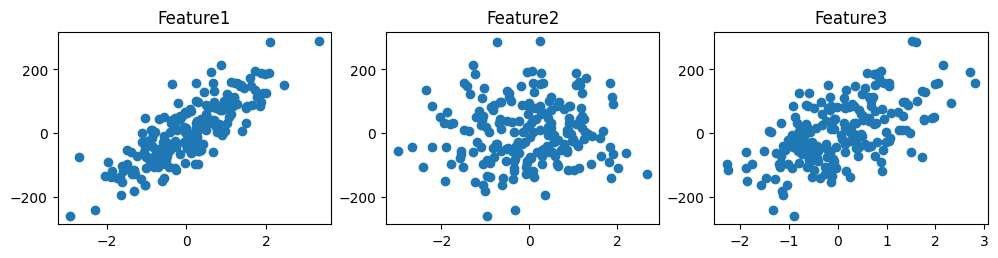

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

### Multicollinearity:

If we are getting VIF values near 1 then we don't have multicollinearity, else if we are getting 5 or 5+ then there is multicollinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [12]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

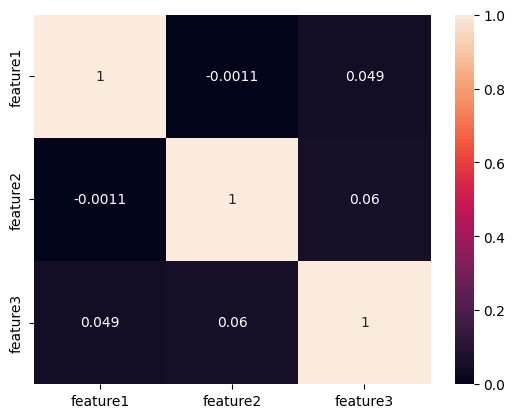

In [15]:
# Another Technique to detect multicollinearity
# Correlation range is -1 to 1, If we get value near to -1 or 1 we can say there is multicollinearity
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)
# But below we see low correlation

### Normality of Residual:
We can use displot to plot it or we can use QQ plot


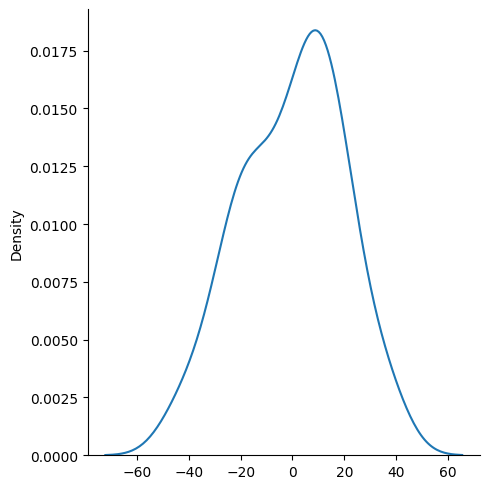

In [17]:
sns.displot(residual, kind='kde')
# We can see this is almost normally distributed apart from a small bump on left side

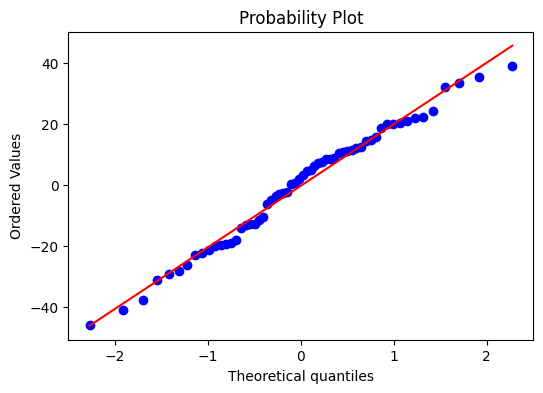

In [19]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

# In QQ plot our point should come very near to the line(red) then it is normal distribution

### Homescedasticity:
We are getting mostly spread uniform here:

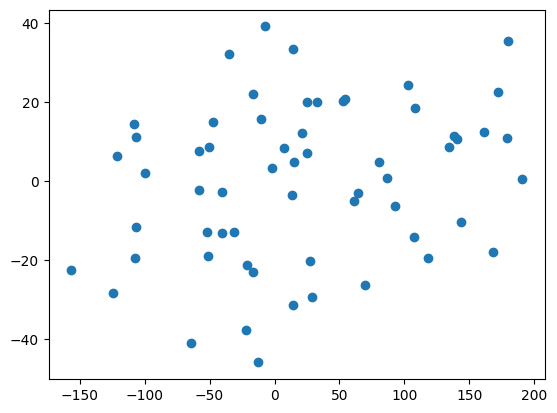

In [20]:
plt.scatter(y_pred, residual)

### Autocorrelation of residuals:
Here we can see below we are getting some random zig zag, so there is not possitve correlation

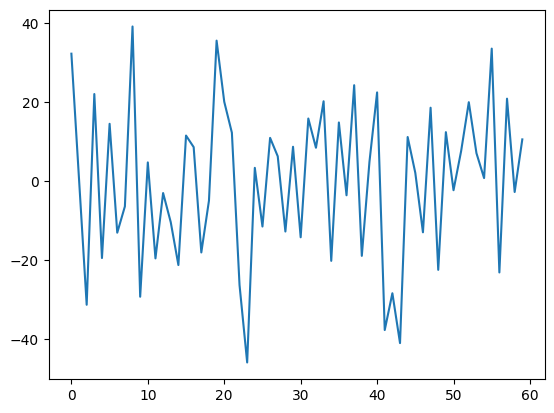

In [21]:
plt.plot(residual)